In [1]:
%matplotlib inline

import os
import glob
import collections
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import numpy as np
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn import preprocessing
from pandas.tools.plotting import scatter_matrix

from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn import datasets, linear_model
from sklearn import metrics, cross_validation
from sklearn.utils import shuffle

/Users/vijay.patel/miniconda2/envs/py36-learning/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
boston = load_boston()
print(boston.data.shape)
print(boston.DESCR)

(506, 13)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by t

In [3]:
df = pd.DataFrame(data=boston.data,
                  columns= boston['feature_names'])
df['TARGET'] = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


 - Each row is a town in Boston. Though we don't know which and don't really care.
 - Some very different scales here, may need to normalise depending on the learning algorithm used.

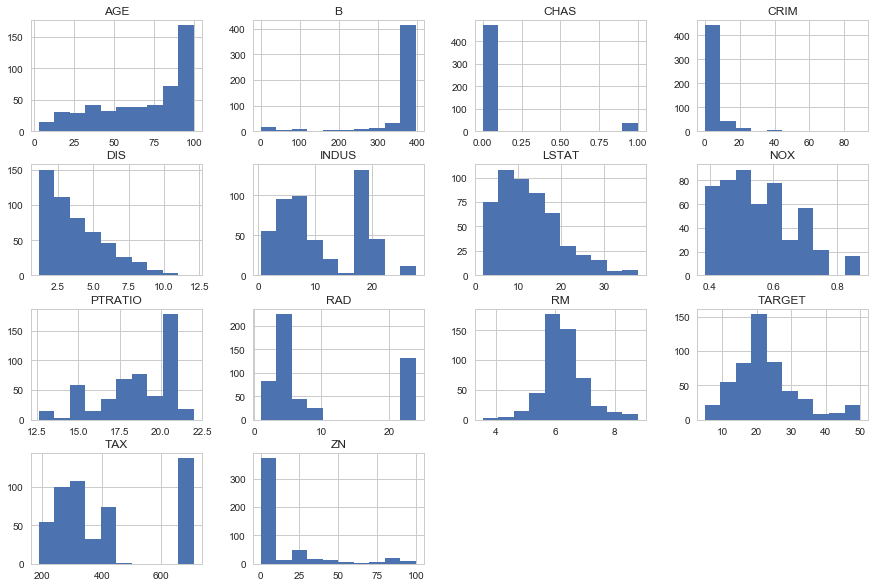

In [5]:
df.hist(figsize=(15, 10))
plt.show()

In [6]:
corr = df.corr()

/Users/vijay.patel/miniconda2/envs/py36-learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


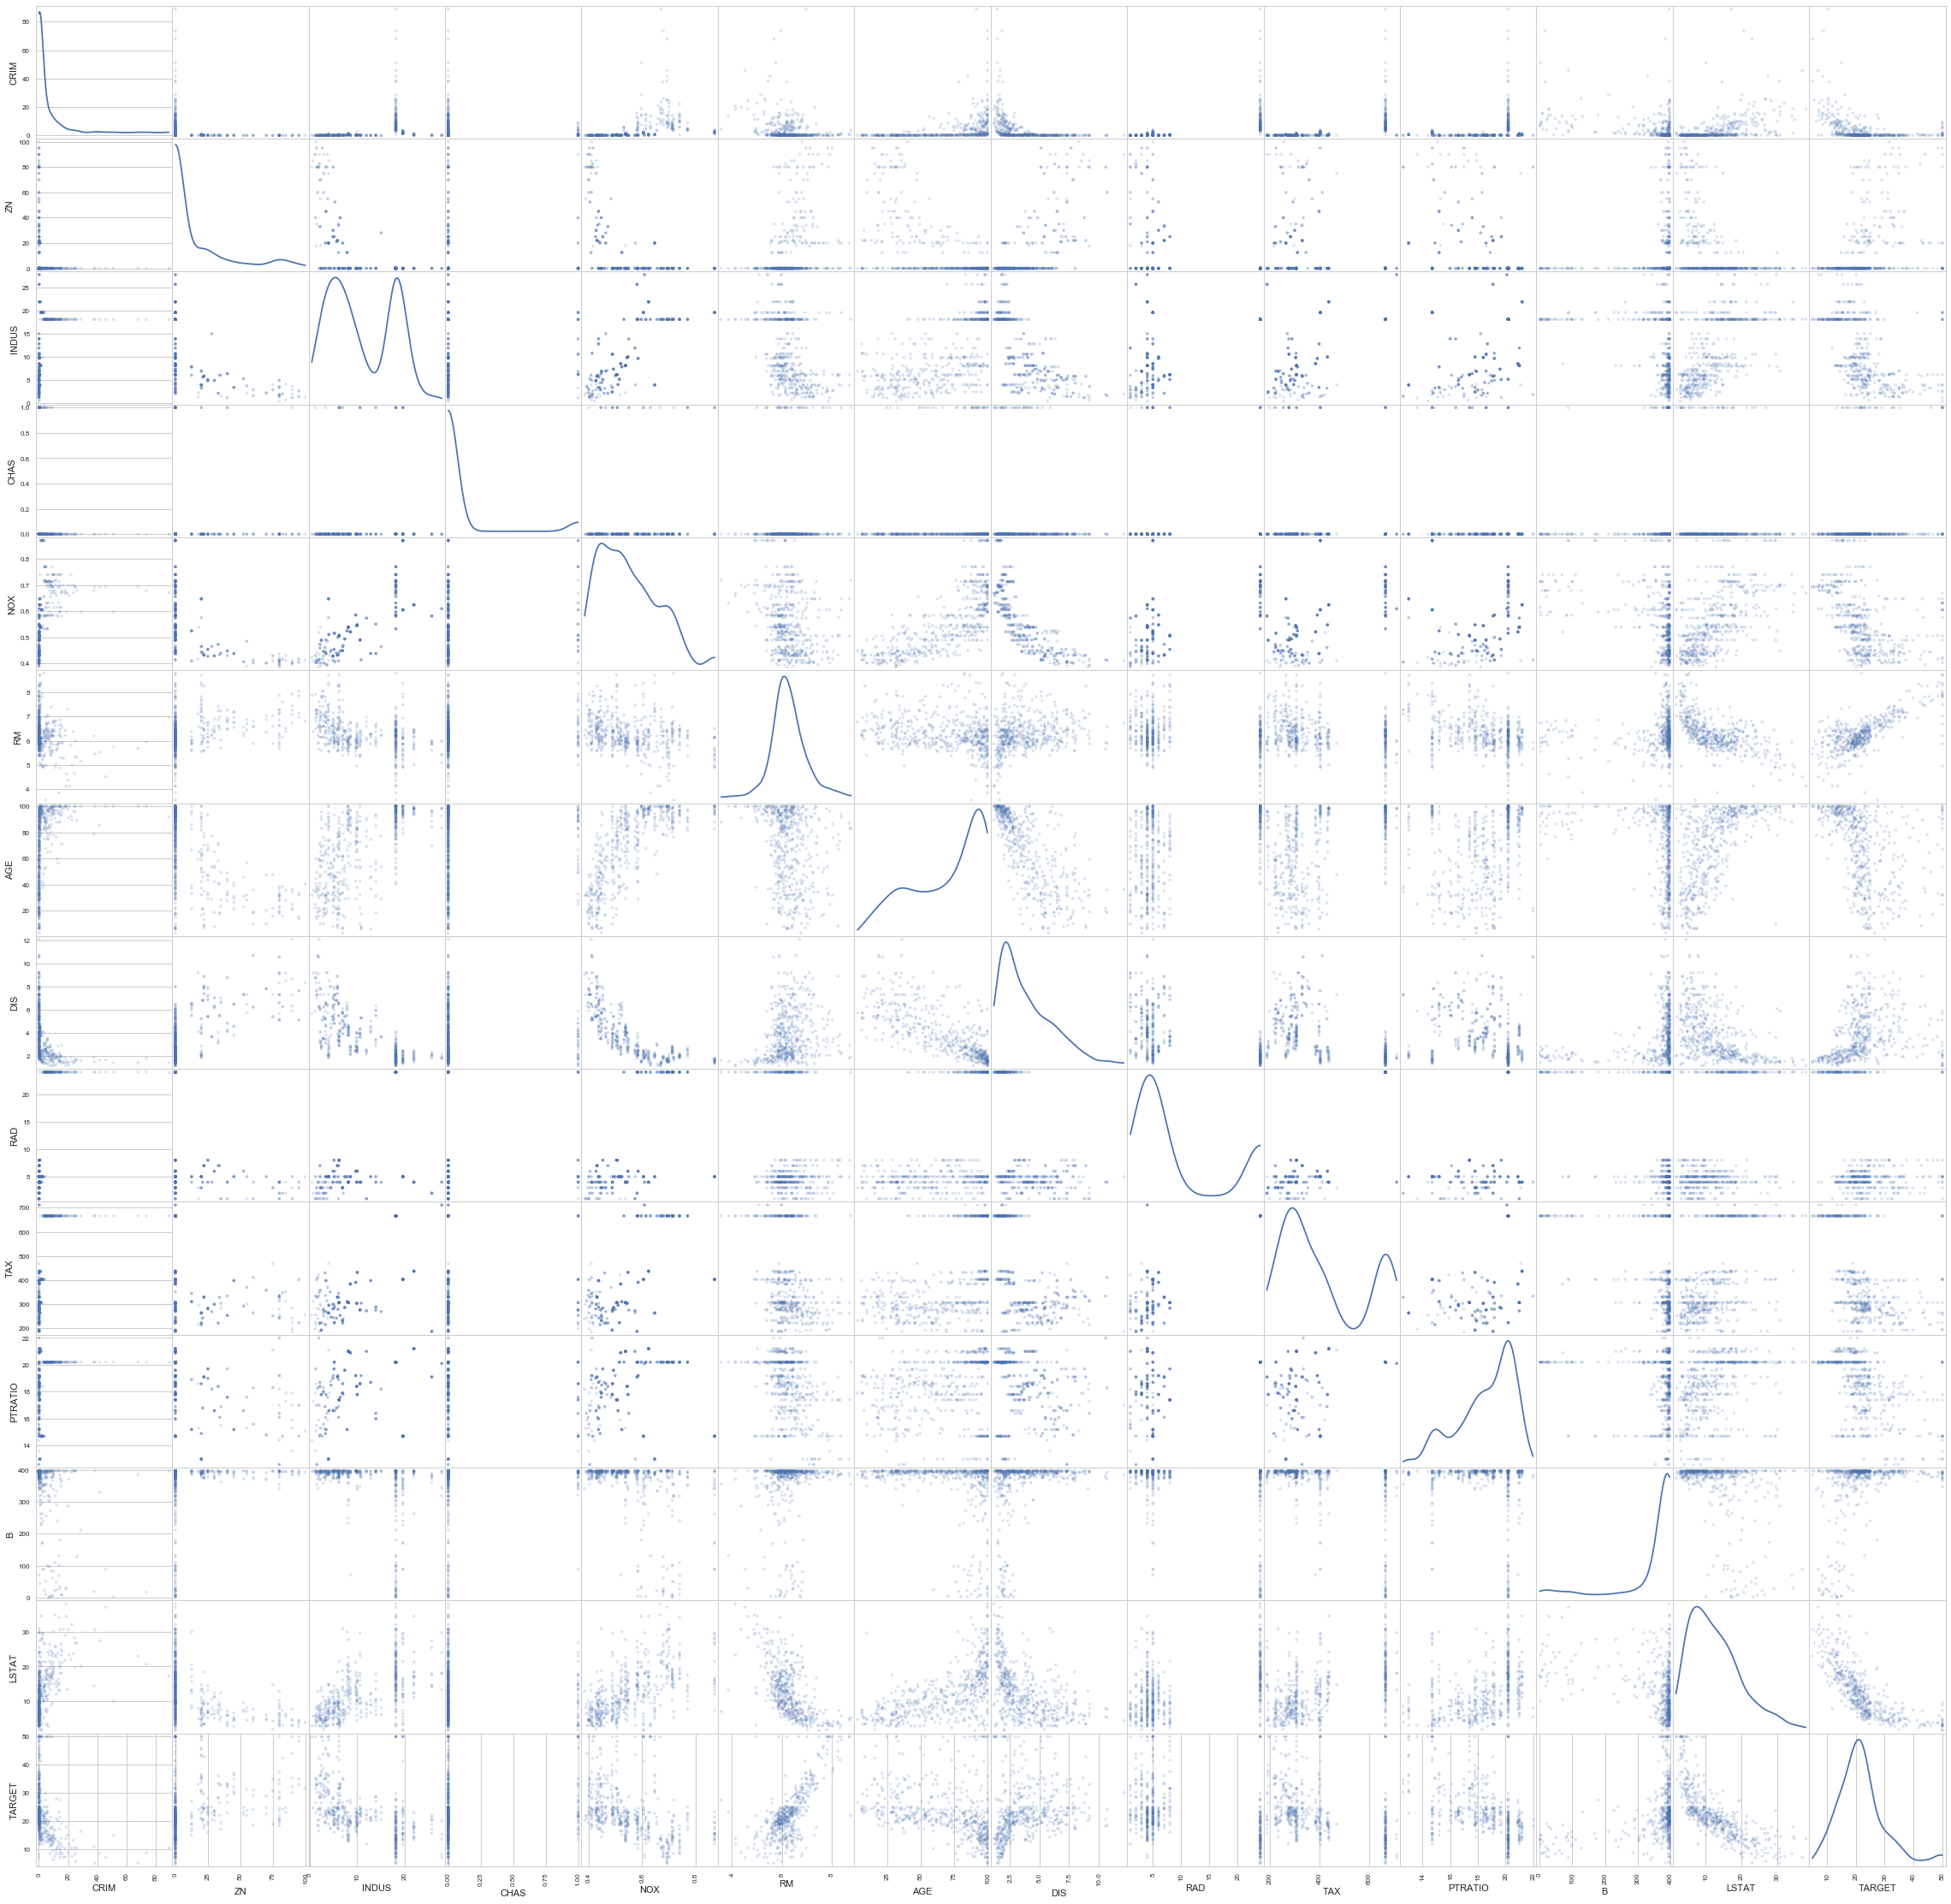

In [7]:
scatter_matrix(df, alpha=0.2, figsize=(40, 40), diagonal='kde')
plt.show()

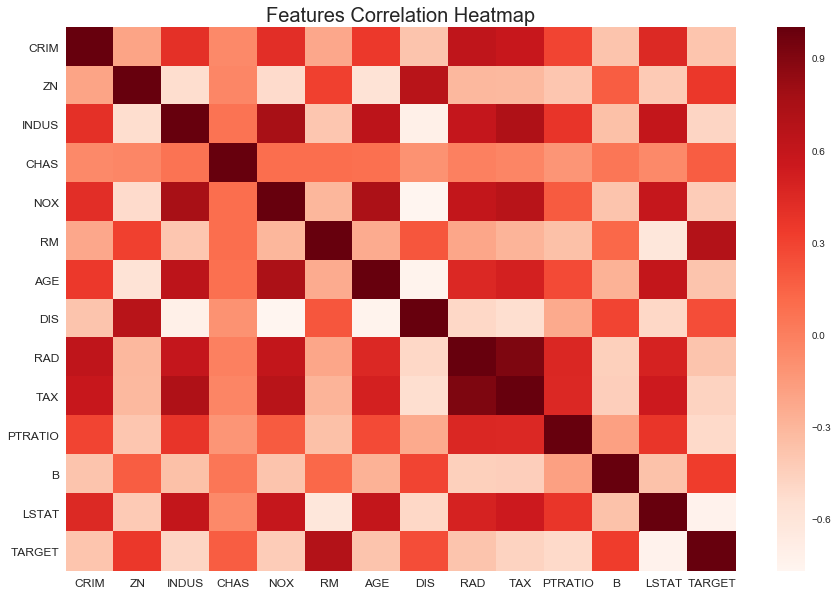

In [8]:
plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, cmap="Reds")
ax.set_title("Features Correlation Heatmap", fontsize = 20)
ax.set_xticklabels(labels = corr.columns.values, fontsize = 12)
ax.set_yticklabels(labels = corr.columns.values, fontsize = 12)
plt.show()

In [9]:
corr\
    .where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))\

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,NaN,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,NaN,NaN,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,NaN,NaN,NaN,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,NaN,NaN,NaN,NaN,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,NaN,NaN,NaN,NaN,NaN,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,NaN,NaN,NaN,NaN,NaN,NaN,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460853,-0.441808,0.543993,-0.468536


Strong positive correlations with positive price:
- RM (average number of rooms per dwelling) = 0.70

Strong negative correlations with positive price:
- LSTAT (% lower status of the population) = -0.73

Features that positively correlate (candidates for dimensionality reduction if needed):

1. TAX (full-value property-tax rate per 10,000) and RAD (index of accessibility to radial highways) = 0.91 
2. TAX (full-value property-tax rate per 10,000) and INDUS (proportion of non-retail business acres per town) = 0.72
3. NOX (nitric oxides concentration (parts per 10 million)) and INDUS (proportion of non-retail business acres per town) = 0.76
4. NOX (nitric oxides concentration (parts per 10 million)) and AGE (proportion of owner-occupied units built prior to 1940) = 0.73
   
   
Features that negatively correlate:

1. INDUS (proportion of non-retail business acres per town) and DIS (weighted distances to five Boston employment centres) = -0.71
2. NOX (nitric oxides concentration (parts per 10 million)) and DIS (weighted distances to five Boston employment centres) = -0.77
3. AGE (proportion of owner-occupied units built prior to 1940) and DIS (weighted distances to five Boston employment centres) = -0.75
